# Otimização de modelos ML para predição de diabetes

## Secções

**- 1 Importação e limpeza dos dados**  

**- 2 EDA**  

**- 3 Otimização de modelos**  

## Origem dos dados
link: https://archive.ics.uci.edu/dataset/529/early+stage+diabetes+risk+prediction+dataset  

Este conjunto de dados foi coletados por meio de questionários diretos de pacientes do Sylhet Diabetes Hospital em Sylhet, Bangladesh e aprovado por um médico.

Early stage diabetes risk prediction dataset.. (2020). UCI Machine Learning Repository. https://doi.org/10.24432/C5VG8H

Dados obtidos em 23 de setembro de 2023.


**Razões para a escolha:**  
- pode ser construído um modelo com dados fáceis de preencher por qualquer pessoa, sem necessidade de exames de sangue ou qualquer procedimento invasivo ou complexo.

**Drawbacks da base de dados:**
- cerca de 500 entradas pode ser pouco para o treino do modelo  
    - no entanto, dados clínicos são difíceis de obter em larga escala
- aparentemente sem citações, apesar de outras DB também arquivas no UCI terem muito mais citações 
- as colunas não acompanhadas de explicações detalhadas sobre os dados contidos nem sobre como os dados foram obtidos
    - os nomes das colunas são em geral auto-explicativos
    
    
## Objetivos
Construir um modelo da IA com dados fáceis de preencher por qualquer pessoa, sem necessidade de exames de sangue ou qualquer procedimento invasivo ou complexo e prever as pessoas são propensas a devevolver Diabetes.

## Colunas do conjunto de Dados

* Age 	
* Sex 		
* Polyuria 		
* Polydipsia 		
* sudden weight loss 		
* weakness 		
* Polyphagia 	
* Genital thrush 	
* visual blurring 		
* Itching 		
* Irritability 	
* delayed healing 		
* partial paresis 		
* muscle stiffness 		
* Alopecia 	
* Obesity 		
* Class 	

## 1 Importação e limpeza dos dados

In [29]:
# importar bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_predict
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, roc_auc_score, recall_score, f1_score
import joblib

In [2]:
#importar dados
df = pd.read_csv('datasets/diabetes_data_upload.csv')
df.head()

Age Gender Polyuria Polydipsia sudden weight loss weakness Polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  Genital thrush visual blurring Itching Irritability delayed healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial paresis muscle stiffness Alopecia Obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

In [3]:
#transformar nomes de colunas em snake_case
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.head()

age gender polyuria polydipsia sudden_weight_loss weakness polyphagia  \
0   40   Male       No        Yes                 No      Yes         No   
1   58   Male       No         No                 No      Yes         No   
2   41   Male      Yes         No                 No      Yes        Yes   
3   45   Male       No         No                Yes      Yes        Yes   
4   60   Male      Yes        Yes                Yes      Yes        Yes   

  genital_thrush visual_blurring itching irritability delayed_healing  \
0             No              No     Yes           No             Yes   
1             No             Yes      No           No              No   
2             No              No     Yes           No             Yes   
3            Yes              No     Yes           No             Yes   
4             No             Yes     Yes          Yes             Yes   

  partial_paresis muscle_stiffness alopecia obesity     class  
0              No              Yes      Yes     Yes  Positive  
1             Yes               No      Yes      No  Positive  
2              No              Yes      Yes      No  Positive  
3              No               No       No      No  Positive  
4             Yes              Yes      Yes     Yes  Positive

**Algumas das colunas correspondem a alterações que provavelmente os usuários terão dificuldade em saber, e nós queremos um formulário com coisas que todo mundo saiba preencher com facilidade. Vamos escolher quais colunas não usar.**

**Notas sobre cada coluna:**  
- 1 polyuria
    - poliúria
    - urinar mais de 2.5L por dia
- 1 polydipsia
    - polidipsia
    - vontade constante de beber água
- 1 sudden_weight_loss
    - perda de peso repentina
- weakness
    - fraqueza
- 1 polyphagia
    - polifagia
    - vontade de comer superior ao normal
- genital_thrush
    - infeção fúngica genital
- 1 visual_blurring
    - visão turva
- itching
    - comichão
- 1 **irritability
    - irritabilidade
- 1 delayed_healing
    - cicatrização lenta
- partial_paresis
    - paresia parcial
    - movimento limitado ou fraco, pouca força e coordenação em parte do corpo
- muscle_stiffness
    - rigidez muscular
- 1 alopecia
    - alopécia
    - perda de cabelo
- 1 **obesity : precisamos perguntar peso e altura para definir o IMC e depois definir se é obesidade ou não**
    - obesidade

In [4]:
#infos do df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   weakness            520 non-null    object
 6   polyphagia          520 non-null    object
 7   genital_thrush      520 non-null    object
 8   visual_blurring     520 non-null    object
 9   itching             520 non-null    object
 10  irritability        520 non-null    object
 11  delayed_healing     520 non-null    object
 12  partial_paresis     520 non-null    object
 13  muscle_stiffness    520 non-null    object
 14  alopecia            520 non-null    object
 15  obesity             520 non-null    object
 16  class               520 no

Sem dados nulos.

In [5]:
#verificar dados únicos para cada coluna
unique_values = {}
for column in df.columns:
    unique_values[column] = df[column].unique()

#mostrar dados unicos
for column, values in unique_values.items():
    print(f'Unique values in {column}: {values}')

Unique values in age: [40 58 41 45 60 55 57 66 67 70 44 38 35 61 54 43 62 39 48 32 42 52 53 37
 49 63 30 50 46 36 51 59 65 25 47 28 68 56 31 85 90 72 69 79 34 16 33 64
 27 29 26]
Unique values in gender: ['Male' 'Female']
Unique values in polyuria: ['No' 'Yes']
Unique values in polydipsia: ['Yes' 'No']
Unique values in sudden_weight_loss: ['No' 'Yes']
Unique values in weakness: ['Yes' 'No']
Unique values in polyphagia: ['No' 'Yes']
Unique values in genital_thrush: ['No' 'Yes']
Unique values in visual_blurring: ['No' 'Yes']
Unique values in itching: ['Yes' 'No']
Unique values in irritability: ['No' 'Yes']
Unique values in delayed_healing: ['Yes' 'No']
Unique values in partial_paresis: ['No' 'Yes']
Unique values in muscle_stiffness: ['Yes' 'No']
Unique values in alopecia: ['Yes' 'No']
Unique values in obesity: ['Yes' 'No']
Unique values in class: ['Positive' 'Negative']


Todas a colunas apresentam os dados esperados.  
  
Vamos verificar a distribuição de idades.

## 2 EDA

In [6]:
#estatística descritiva das idades
df.describe()

age
count  520.000000
mean    48.028846
std     12.151466
min     16.000000
25%     39.000000
50%     47.500000
75%     57.000000
max     90.000000

Média e mediana próximas indicam um distribuição provavelmente próxima do normal sem muitos outliers.

### Resumo:

* Temos um conjonto de dados com as seguintes caracteristica:

* Contagem: Existem 520 observações (ou registos) no nosso dataset.


* Média (mean): A idade média é de aproximadamente 48,03 anos.


* Desvio Padrão (std): O desvio padrão é cerca de 12,15 anos. Isso indica o quanto os valores individuais se afastam da média. Um desvio padrão maior indica uma dispersão maior dos dados.


* Valor Mínimo (min): A idade mínima registrada no conjunto de dados é 16 anos.


* Primeiro Quartil (25% - Q1): 25% das idades estão abaixo de 39 anos.


* Mediana (50% - Q2): A mediana, que é o valor que divide o conjunto de dados ao meio, é de 47,5 anos. Isso significa que metade das idades estão abaixo de 47,5 anos e metade está acima.


* Terceiro Quartil (75% - Q3): 75% das idades estão abaixo de 57 anos.


* Valor Máximo (max): A idade máxima registrada no conjunto de dados é de 90 anos.


* Não temos Valores Ausentes no conjunto de dados.

* Criamos a coluna ID, para nos certificar que não temos dados duplicados no nosso conjunto de dados

In [7]:
#distribuição de dados
df['age'].hist()

<AxesSubplot:>

Nada de estranho, com ums distribuição relativamente normal.

**Vamos apagar as colunas em que usuários terão mais dificuldade de preencher com acurácia.(e portanto farão o questionário desnecessariamente tedioso)**

In [8]:
#apagar colunas difíceis de auto-avaliação

del_cols = ['weakness', 'genital_thrush', 'itching', 'partial_paresis', 'muscle_stiffness']
df.drop(columns=del_cols, inplace=True)
df.head()


age gender polyuria polydipsia sudden_weight_loss polyphagia  \
0   40   Male       No        Yes                 No         No   
1   58   Male       No         No                 No         No   
2   41   Male      Yes         No                 No        Yes   
3   45   Male       No         No                Yes        Yes   
4   60   Male      Yes        Yes                Yes        Yes   

  visual_blurring irritability delayed_healing alopecia obesity     class  
0              No           No             Yes      Yes     Yes  Positive  
1             Yes           No              No      Yes      No  Positive  
2              No           No             Yes      Yes      No  Positive  
3              No           No             Yes       No      No  Positive  
4             Yes          Yes             Yes      Yes     Yes  Positive

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 520 entries, 0 to 519
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   age                 520 non-null    int64 
 1   gender              520 non-null    object
 2   polyuria            520 non-null    object
 3   polydipsia          520 non-null    object
 4   sudden_weight_loss  520 non-null    object
 5   polyphagia          520 non-null    object
 6   visual_blurring     520 non-null    object
 7   irritability        520 non-null    object
 8   delayed_healing     520 non-null    object
 9   alopecia            520 non-null    object
 10  obesity             520 non-null    object
 11  class               520 non-null    object
dtypes: int64(1), object(11)
memory usage: 48.9+ KB


Agora temos 12 colunas ao todo. 11 de features e 1 de target (class). 

In [10]:
#substituir valores de string por logicos 1 e 0
# Yes e Positive são 1. Male é 0 e Female é 1.
df.replace({'Yes': 1, 'No': 0, 'Positive': 1, 'Negative': 0, 'Female': 1, 'Male': 0}, inplace=True)
df.head()

age  gender  polyuria  polydipsia  sudden_weight_loss  polyphagia  \
0   40       0         0           1                   0           0   
1   58       0         0           0                   0           0   
2   41       0         1           0                   0           1   
3   45       0         0           0                   1           1   
4   60       0         1           1                   1           1   

   visual_blurring  irritability  delayed_healing  alopecia  obesity  class  
0                0             0                1         1        1      1  
1                1             0                0         1        0      1  
2                0             0                1         1        0      1  
3                0             0                1         0        0      1  
4                1             1                1         1        1      1

In [11]:
#ver o balanceamento de classe de class (futuro target)
df['class'].sum()/len(df)

0.6153846153846154

62% de entradas positivas para diabetes (vs 38% negativas)

In [12]:
#verificar imbalanceamento para diferentes colunas
for column in df.columns:
    rel_freq = df[column].sum()/len(df)
    print(f'{column}: \n{rel_freq}\n')

age: 
48.02884615384615

gender: 
0.36923076923076925

polyuria: 
0.49615384615384617

polydipsia: 
0.4480769230769231

sudden_weight_loss: 
0.4173076923076923

polyphagia: 
0.45576923076923076

visual_blurring: 
0.4480769230769231

irritability: 
0.2423076923076923

delayed_healing: 
0.4596153846153846

alopecia: 
0.34423076923076923

obesity: 
0.16923076923076924

class: 
0.6153846153846154



Ignorando 'age', as classes mais desbalanceadas são: gender (com 37% mulheres), irritabilidade (com 24% sim), e obesidade (com 17%).

### Análise de 'class'

In [13]:
# Contagem de diagnósticos
diagnosis_counts = df['class'].value_counts()

# Criar um gráfico de barras
plt.figure(figsize=(8, 6))
diagnosis_counts.plot(kind='bar', color=['skyblue', 'lightcoral'])
plt.title('Contagem de Diagnósticos de Diabetes')
plt.xlabel('Diagnóstico')
plt.ylabel('Contagem')
plt.xticks(rotation=0)
plt.show()

No conjunto de dados, há 320 observações com o diagnóstico "Positive" (positivo para diabetes) e 200 observações com o diagnóstico "Negative" (negativo para diabetes). Essas contagens representam o número de casos positivos e negativos para diabetes no conjunto de dados.

### Análise de gênero

In [15]:
df['gender'].value_counts()

0    328
1    192
Name: gender, dtype: int64

In [16]:
(df['gender'].value_counts() / len(df)) * 100

0    63.076923
1    36.923077
Name: gender, dtype: float64

No conjunto de dados, há 328 observações de pacientes do sexo masculino (Male) e 192 observações de pacientes do sexo feminino (Female). Onde 63% do sexo masculino e 37% do sexo Femenino

In [17]:
#frequência de gênero vs diagnostico
count_df = df.groupby(['gender', 'class']).size().reset_index(name='Count')
count_df

gender  class  Count
0       0      0    181
1       0      1    147
2       1      0     19
3       1      1    173

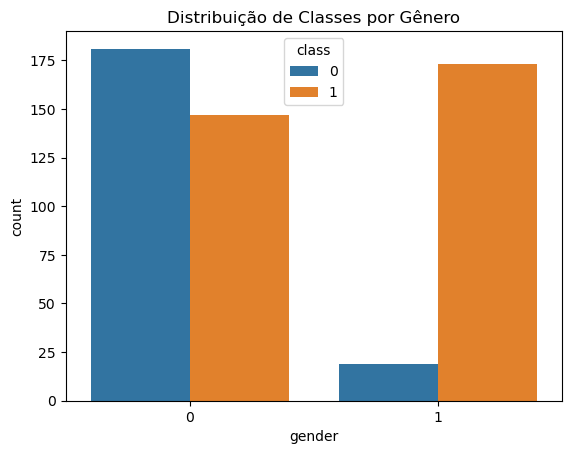

In [20]:
#gráfico de gênero vs diagnostico
sns.countplot(data=df, x='gender', hue='class')
plt.title('Distribuição de Classes por Gênero')
plt.show()

19 pacientes do sexo feminino com diagnóstico negativo (0).  
173 pacientes do sexo feminino com diagnóstico positivo (1).  
181 pacientes do sexo masculino com diagnóstico negativo (0).  
147 pacientes do sexo masculino com diagnóstico positivo (1).  
**No conjunto de dados usados, há uma incidência muito maior de diagnóstico positivo nas mulheres do que nos homens. Para melhoria futura do modelo precisamos utilizar um conjunto de dados mais balanceado.**  
**Podemos também considerar tirar o gênero da análise por criar um viés de diagnóstico.**

### Análise de idades

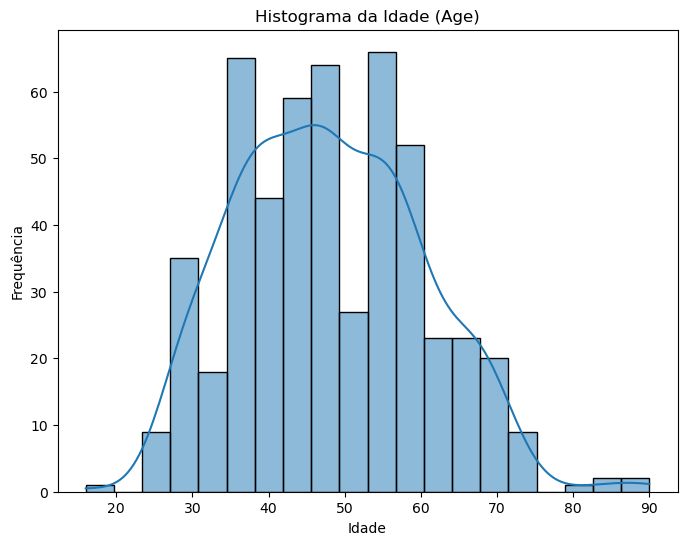

In [25]:
#histograma de frequência por idade
# Definindo o layout da figura
plt.figure(figsize=(8, 6))

# Plotando o histograma da variável 'Age'
sns.histplot(df['age'], bins=20, kde=True)
plt.title('Histograma da Idade (Age)')
plt.xlabel('Idade')
plt.ylabel('Frequência')

# Exibindo o histograma
plt.show()

Podemos observar que a maioria das pessoas no conjunto de dados parece estar na faixa dos 40 a 50 anos de idade. Também podemos ver que a distribuição parece seguir uma forma geralmente simétrica, com uma cauda mais longa à direita, o que sugere que há algumas pessoas mais velhas no conjunto de dados.

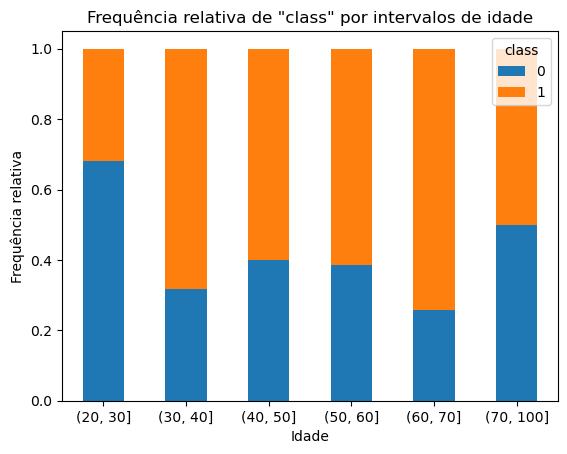

In [27]:
# Define age intervals (bins)
age_bins = [20, 30, 40, 50, 60, 70, 100]

# criar intervalos para idade usando pd.cut
df['age_intervals'] = pd.cut(df['age'], bins=age_bins)

# calcular a frequencia relativa de 'class' dentro de cada intervalo
relative_freq = df.groupby(['age_intervals', 'class']).size().unstack(fill_value=0)
relative_freq = relative_freq.div(relative_freq.sum(axis=1), axis=0)

# Plotar gráfico de barras
ax = relative_freq.plot(kind='bar', stacked=True)
ax.set_ylabel('Frequência relativa')
ax.set_xlabel('Idade')

plt.title('Frequência relativa de "class" por intervalos de idade')
plt.xticks(rotation=0)
plt.legend(title='class')
plt.show()

Até aos 30 anos, a frequência de diabetes é menor, mas mantém-se mais ou menos constante com a idade.  

Não parece haver uma tendência clara de que a idade esteja estritamente relacionada ao diagnóstico de diabetes. Não podemos dizer definitivamente que uma faixa etária específica tem mais ou menos chances de ser diagnosticada com diabetes com base apenas neste gráfico.

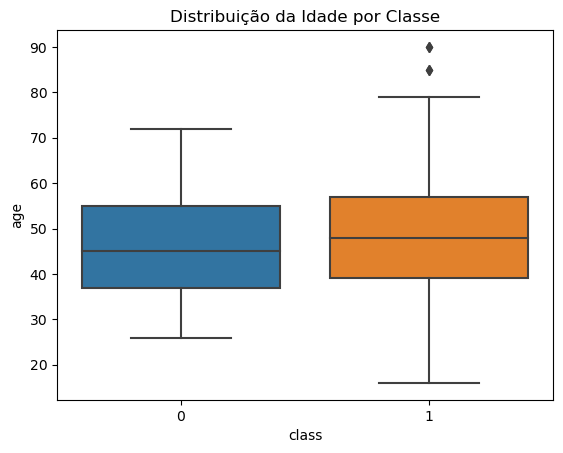

In [28]:
#idade vs diagnóstico (class)
sns.boxplot(x='class', y='age', data=df)
plt.title('Distribuição da Idade por Classe')
plt.show()

In [30]:
#comparação estatística entre as colunas do gráfico acima

# Dividir os dados em dois grupos com base na coluna 'class'
classe_0 = df[df['class'] == 0]['age']
classe_1 = df[df['class'] == 1]['age']

# Realizar um teste t independente para comparar as médias dos dois grupos
estatistica_t, valor_p = stats.ttest_ind(classe_0, classe_1, equal_var=False)

# Exibir os resultados
print("Estatística T:", estatistica_t)
print("Valor P:", valor_p)

# Determinar o nível de significância (alpha)
alpha = 0.05

# Verificar se o valor P é menor que o nível de significância
if valor_p < alpha:
    print("Rejeitar a hipótese nula: Existe uma diferença significativa entre os grupos.")
else:
    print("Não rejeitar a hipótese nula: Não há diferença significativa entre os grupos.")


Estatística T: -2.489015284677564
Valor P: 0.013193281214799128
Rejeitar a hipótese nula: Existe uma diferença significativa entre os grupos.


In [34]:
#estatística descritiva de idades para grupo sem diabetes
classe_0.describe()

count    200.000000
mean      46.360000
std       12.080983
min       26.000000
25%       37.000000
50%       45.000000
75%       55.000000
max       72.000000
Name: age, dtype: float64

In [35]:
#estatística descritiva de idades para grupo COM diabetes
classe_1.describe()

count    320.000000
mean      49.071875
std       12.097481
min       16.000000
25%       39.000000
50%       48.000000
75%       57.000000
max       90.000000
Name: age, dtype: float64

* Para a classe 1 (positivo), a mediana da idade é de 48 anos, com um intervalo interquartil (IQR) entre aproximadamente 39 e 57 anos. Existem alguns valores discrepantes (outliers) à direita da caixa, o que indica que há algumas pessoas mais velhas nessa classe.

* Para a classe 0 (negativo), a mediana da idade também parece estar em torno de 45 anos, com um IQR 37 a 55 anos.

* Globalmente, as distribuições da idade nas duas classes são bastante semelhantes, com sobreposição significativa entre as caixas, mas ainda assim a diferença de idade é significativa.

## 3 Otimização de modelos ML

### Ajuste dos dados e Separação em teste e treino

In [36]:
# dividir em festures e target
X = df.drop(columns = ['class', 'age_intervals'])
y = df['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42) #20% dos dados reservados para teste

In [37]:
#scaling dos dados
#colunas numéricas
numeric = ['age']

#preparaçãoda variável de escalonamento com as colunas numéricas do treino
scaler = StandardScaler()
scaler.fit(X_train[numeric])

#transformação da coluna com scaling
X_train[numeric] = scaler.transform(X_train[numeric])
X_test[numeric] = scaler.transform(X_test[numeric])

**Com os dados prontos, vamos otimizar os modelos.**  
- usaremos bootstrap para evitar viés no fitting dos modelos
- as métricas a usar serão
    - recall: melhor que precisão neste caso porque é preferível sobre-estimar os casos positivos
    - F1: para garantir que não há um exagero da sobre-estimação, então é uma métrica que toma em conta ambos o recall e precisão

### Regressão logística

In [38]:
# Logistic Regression
model = LogisticRegression()

#fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

lr_f1 = f1_score(y_train, y_predicted)
lr_recall = recall_score(y_train, y_predicted)


print('F1 Score on Training Set:', lr_f1)
print('Recall Score on Training Set:', lr_recall)

F1 Score on Training Set: 0.923076923076923
Recall Score on Training Set: 0.9156626506024096


**O modelo com melhor valor de recall é também o de maior F1.**  
 
**Recall:0.923**  
**F1: 0.916**

### Decicion Tree

In [40]:
#guardar valores
depth = []
leaves = []
weights = []
f1_dt = []
recall_dt = []

for dep in range(2,23,5):
    for leave in range(1,21,5):
        for weight in [None, 'balanced']:
            # Decision Tree Classifier
            model = DecisionTreeClassifier(
                max_depth = dep,
                min_samples_leaf = leave,
                class_weight = weight,
                random_state=42
            )
            
            #guardar valores dos parâmetros
            depth.append(dep)
            leaves.append(leave)
            weights.append(weight)
                     


            #fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
            y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

            f1 = f1_score(y_train, y_predicted)
            recall = recall_score(y_train, y_predicted)
            
            f1_dt.append(f1)
            recall_dt.append(recall)
            
# criar dicionário a partir das listas
data = {
    'Max Depth': depth,
    'Min Samples per Leaf': leaves,
    'Class Weight': weights,
    'F1 Score': f1_dt,
    'Recall Score': recall_dt
}

# criar DataFrame a partir do dicionário
dt_df = pd.DataFrame(data)

#ver valores ordenados por recall
dt_df.sort_values(by=['Recall Score','F1 Score'], ascending=False)



Max Depth  Min Samples per Leaf Class Weight  F1 Score  Recall Score
16         12                     1         None  0.965517      0.955823
24         17                     1         None  0.965517      0.955823
32         22                     1         None  0.965517      0.955823
8           7                     1         None  0.963563      0.955823
9           7                     1     balanced  0.959514      0.951807
17         12                     1     balanced  0.957230      0.943775
25         17                     1     balanced  0.957230      0.943775
33         22                     1     balanced  0.957230      0.943775
12          7                    11         None  0.908000      0.911647
20         12                    11         None  0.908000      0.911647
28         17                    11         None  0.908000      0.911647
36         22                    11         None  0.908000      0.911647
14          7                    16         None  0.890196      0.911647
22         12                    16         None  0.890196      0.911647
30         17                    16         None  0.890196      0.911647
38         22                    16         None  0.890196      0.911647
4           2                    11         None  0.884000      0.887550
6           2                    16         None  0.884000      0.887550
11          7                     6     balanced  0.914761      0.883534
19         12                     6     balanced  0.914761      0.883534
27         17                     6     balanced  0.914761      0.883534
35         22                     6     balanced  0.914761      0.883534
10          7                     6         None  0.910973      0.883534
18         12                     6         None  0.910973      0.883534
26         17                     6         None  0.910973      0.883534
34         22                     6         None  0.910973      0.883534
2           2                     6         None  0.881764      0.883534
3           2                     6     balanced  0.881764      0.883534
0           2                     1         None  0.884848      0.879518
1           2                     1     balanced  0.884848      0.879518
5           2                    11     balanced  0.871690      0.859438
7           2                    16     balanced  0.871690      0.859438
13          7                    11     balanced  0.893082      0.855422
21         12                    11     balanced  0.893082      0.855422
29         17                    11     balanced  0.893082      0.855422
37         22                    11     balanced  0.893082      0.855422
15          7                    16     balanced  0.870103      0.847390
23         12                    16     balanced  0.870103      0.847390
31         17                    16     balanced  0.870103      0.847390
39         22                    16     balanced  0.870103      0.847390

**O modelo com melhor valor de recall é também o de maior F1.**  
Os hiperparâmetros (menos complexos) são:  
max_depth = 12,  
min_samples_leaf = 1,  
class_weight = None   
  
**Recall:0.956**  
**F1: 0.966**  


Interessante notar que o balanceamento piorou um pouco o modelo. Mas pode dever-se ao baixo número de amostras usado.

### Random Forest

In [42]:
# Random Forest Classifier


#guardar valores
depth = []
estimators = []
weights = []
f1_dt = []
recall_dt = []

for dep in range(2,23,5):
    for est in range(1,31,5):
        for weight in [None, 'balanced']:
            # Decision Tree Classifier
            model = RandomForestClassifier(
                max_depth = dep,
                n_estimators = est,
                class_weight = weight,
                random_state=42
            )
            
            #guardar valores dos parâmetros
            depth.append(dep)
            estimators.append(est)
            weights.append(weight)
                     


            #fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
            y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

            f1 = f1_score(y_train, y_predicted)
            recall = recall_score(y_train, y_predicted)
            
            f1_dt.append(f1)
            recall_dt.append(recall)
            
# criar dicionário a partir das listas
data = {
    'Max Depth': depth,
    'Max number of estimators': estimators,
    'Class Weight': weights,
    'F1 Score': f1_dt,
    'Recall Score': recall_dt
}

# criar DataFrame a partir do dicionário
rf_df = pd.DataFrame(data)

#ver valores ordenados por recall
rf_df.sort_values(by=['Recall Score','F1 Score'] , ascending=False)




Max Depth  Max number of estimators Class Weight  F1 Score  Recall Score
34         12                        26         None  0.971774      0.967871
46         17                        26         None  0.971774      0.967871
58         22                        26         None  0.971774      0.967871
32         12                        21         None  0.969819      0.967871
33         12                        21     balanced  0.969819      0.967871
44         17                        21         None  0.969819      0.967871
45         17                        21     balanced  0.969819      0.967871
56         22                        21         None  0.969819      0.967871
57         22                        21     balanced  0.969819      0.967871
30         12                        16         None  0.971660      0.963855
42         17                        16         None  0.971660      0.963855
54         22                        16         None  0.971660      0.963855
31         12                        16     balanced  0.969697      0.963855
43         17                        16     balanced  0.969697      0.963855
55         22                        16     balanced  0.969697      0.963855
27         12                         6     balanced  0.967742      0.963855
29         12                        11     balanced  0.967742      0.963855
35         12                        26     balanced  0.967742      0.963855
39         17                         6     balanced  0.967742      0.963855
41         17                        11     balanced  0.967742      0.963855
47         17                        26     balanced  0.967742      0.963855
51         22                         6     balanced  0.967742      0.963855
53         22                        11     balanced  0.967742      0.963855
59         22                        26     balanced  0.967742      0.963855
17          7                        11     balanced  0.969574      0.959839
19          7                        16     balanced  0.961616      0.955823
26         12                         6         None  0.965377      0.951807
38         17                         6         None  0.965377      0.951807
50         22                         6         None  0.965377      0.951807
21          7                        21     balanced  0.963415      0.951807
28         12                        11         None  0.961460      0.951807
40         17                        11         None  0.961460      0.951807
52         22                        11         None  0.961460      0.951807
23          7                        26     balanced  0.959514      0.951807
20          7                        21         None  0.957576      0.951807
15          7                         6     balanced  0.959350      0.947791
16          7                        11         None  0.959350      0.947791
18          7                        16         None  0.955285      0.943775
14          7                         6         None  0.953347      0.943775
22          7                        26         None  0.953347      0.943775
24         12                         1         None  0.948875      0.931727
36         17                         1         None  0.948875      0.931727
48         22                         1         None  0.948875      0.931727
12          7                         1         None  0.940206      0.915663
25         12                         1     balanced  0.936345      0.915663
37         17                         1     balanced  0.936345      0.915663
49         22                         1     balanced  0.936345      0.915663
13          7                         1     balanced  0.919588      0.895582
4           2                        11         None  0.895277      0.875502
2           2                         6         None  0.889813      0.859438
6           2                        16         None  0.889813      0.859438


Temos 3 modelos com os mesmo valores de Recall e F1. Todos têm o mesmo número de estimators. Então melhor usar o modelo mais simples (e eficiente), ou seja, com menor profundidade: max_depth= 12.

Mas antes vamos tentar otimizar um pouco à volta desse valor.

In [43]:
# Random Forest Classifier - finetuning dos hiperparâmetros


#guardar valores
depth = []
f1_fc2 = []
recall_fc2 = []

for dep in range(8,17):

    # Decision Tree Classifier
    model = RandomForestClassifier(
        max_depth = dep,
        n_estimators = 26,
        class_weight = None,
        random_state=42
    )

    #guardar valores dos parâmetros
    depth.append(dep)



    #fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
    y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

    f1 = f1_score(y_train, y_predicted)
    recall = recall_score(y_train, y_predicted)

    f1_fc2.append(f1)
    recall_fc2.append(recall)
            
# criar dicionário a partir das listas
data = {
    'Max Depth': depth,
    'F1 Score': f1_fc2,
    'Recall Score': recall_fc2
}

# criar DataFrame a partir do dicionário
rf2_df = pd.DataFrame(data)

#ver valores ordenados por recall
rf2_df.sort_values(by=['Recall Score','F1 Score', 'Max Depth'] , ascending=False)




Max Depth  F1 Score  Recall Score
8         16  0.971774      0.967871
7         15  0.971774      0.967871
6         14  0.971774      0.967871
5         13  0.971774      0.967871
4         12  0.971774      0.967871
3         11  0.971774      0.967871
2         10  0.971774      0.967871
0          8  0.967742      0.963855
1          9  0.965657      0.959839

**Melhor modelo de Random Forest:**
- max_depth = 10
- n_estimators = 26
- class_weight = None

**Recall: 0.968**  
**F1: 0.972**

### Gradient Descent: LightGBM

In [45]:
# LightGBM


#guardar valores

leaves = []
depths = []
learns = []
balances = []
f1_lg = []
recall_lg = []


for leaf in range(10,51,10):
    for dep in range(1,9,2):
        for learn in range(1,51,10): #ficará 0.01 a 0.5
            for balance in [False, True]:
            
            
                model = LGBMClassifier(
                    num_leaves=leaf,
                    max_depth=dep,
                    learning_rate=learn/100,
                    is_unbalance=balance,
                    random_state=12345
                )

                #guardar valores dos parâmetros
                depths.append(dep)
                leaves.append(leaf)
                learns.append(learn)
                balances.append(balance)
                



                #fazer bootstraping para obter dados mais fidedignos (y_predicted contem as predições de todos os folds)
                y_predicted = cross_val_predict(model, X_train, y_train, cv=4)

                f1 = f1_score(y_train, y_predicted)
                recall = recall_score(y_train, y_predicted)

                f1_lg.append(f1)
                recall_lg.append(recall)
            
# criar dicionário a partir das listas
data = {
    'num_leaves': leaves,
    'max_depth': depths,
    'learning_rate': learns,
    'is_unbalance': balances,
    'F1 Score': f1_lg,
    'Recall Score': recall_lg
}

# criar DataFrame a partir do dicionário
lg_df = pd.DataFrame(data)

#ver valores ordenados por recall
lg_df.sort_values(by=['Recall Score','F1 Score'] , ascending=False).head(30)




num_leaves  max_depth  learning_rate  is_unbalance  F1 Score  \
24           10          5             21         False  0.969574   
36           10          7             31         False  0.969574   
66           20          5             31         False  0.969574   
106          30          5             31         False  0.969574   
146          40          5             31         False  0.969574   
186          50          5             31         False  0.969574   
26           10          5             31         False  0.967480   
64           20          5             21         False  0.967480   
104          30          5             21         False  0.967480   
144          40          5             21         False  0.967480   
184          50          5             21         False  0.967480   
25           10          5             21          True  0.965517   
23           10          5             11          True  0.963563   
22           10          5             11         False  0.961616   
28           10          5             41         False  0.967347   
29           10          5             41          True  0.967347   
34           10          7             21         False  0.965377   
38           10          7             41         False  0.965377   
74           20          7             21         False  0.965377   
75           20          7             21          True  0.965377   
78           20          7             41         False  0.965377   
79           20          7             41          True  0.965377   
114          30          7             21         False  0.965377   
115          30          7             21          True  0.965377   
118          30          7             41         False  0.965377   
119          30          7             41          True  0.965377   
154          40          7             21         False  0.965377   
155          40          7             21          True  0.965377   
158          40          7             41         False  0.965377   
159          40          7             41          True  0.965377   

     Recall Score  
24       0.959839  
36       0.959839  
66       0.959839  
106      0.959839  
146      0.959839  
186      0.959839  
26       0.955823  
64       0.955823  
104      0.955823  
144      0.955823  
184      0.955823  
25       0.955823  
23       0.955823  
22       0.955823  
28       0.951807  
29       0.951807  
34       0.951807  
38       0.951807  
74       0.951807  
75       0.951807  
78       0.951807  
79       0.951807  
114      0.951807  
115      0.951807  
118      0.951807  
119      0.951807  
154      0.951807  
155      0.951807  
158      0.951807  
159      0.951807

**Melhor modelo de LightGBM:**  

Escolhendo o modelo menos complexo entre os que têm maior valor de Racall e F1, obtemos o seguinte:
- num_leaves = 10
- max_depth = 5
- learning_rate	 = 21
- is_unbalance = False

**Recall: 0.960**  
**F1: 0.970**

## Exportar modelo

Os modelos testados apresentaram os seguintes valores:  

**Regressão Logística**  
Recall:0.923  
    F1: 0.916  

**Decision Tree**  
Recall:0.956  
    F1: 0.966  


**Random Forest:**  
Recall: 0.968  
    F1: 0.972  

**LightGBM**  
Recall: 0.960  
    F1: 0.970  
    
O modelo de Random Forest foi o que apresentou melhores resultados, com os hiperparâmetros:  

max_depth = 10  
n_estimators = 26  
class_weight = None

### Verificar no conjunto de testes

In [46]:
# Random Forest Classifier - verificar no teste e exportar


final_model = RandomForestClassifier(
    max_depth = 8,
    n_estimators = 26,
    class_weight = None
)

# Fit the model on your training data
final_model.fit(X_train, y_train)

predicted = final_model.predict(X_test)

f1 = f1_score(y_test, predicted)
recall = recall_score(y_test, predicted)

print(f'Valor de recall é:{recall}')
print(f'Valor de F1 score é:{f1}')

Valor de recall é:0.9859154929577465
Valor de F1 score é:0.9859154929577465


### Conclusão

Obtivemos valores ainda melhores no conjunto de testes, o que indica que o modelo não está overfitting.  

De notar que os valores de recall e F1 encontram-se bem próximos de 1.  

Podemos exportar o modelo para produção.

In [47]:
# guardar o modelo em um arquivo
joblib.dump(final_model, 'iathon_diabetes_prediction_sylhetdb_rf_model.pkl')

['diabetes_prediction_sylhetdb_rf_model.pkl']